In [1]:
! pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.6/site-packages (0.24.2)


In [1]:
import illustris_python as il
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

In [3]:
basePath = '../sims.TNG/TNG100-1/output'

In [4]:
mtype = il.groupcat.loadSubhalos(basePath, 91, fields=['SubhaloMassType'])
gmetal = il.groupcat.loadSubhalos(basePath, 91, fields=['SubhaloGasMetallicity'])
sfr = il.groupcat.loadSubhalos(basePath, 91, fields=['SubhaloSFR'])

In [5]:
sfr.shape

(4449889,)

In [6]:
pdgmetal = pd.DataFrame(gmetal, columns=['Gas Metallicity'])
pdsfr = pd.DataFrame(sfr, columns=['Stellar Formation Rate'])

In [7]:
gmass = mtype[:,0]
dmmass = mtype[:,1]
stmass = mtype[:,4]
bhmass = mtype[:,5]

In [8]:
pdgmass = np.log10((pd.DataFrame(gmass, columns=['Gas Mass']))*(10**10))
pddmmass = np.log10((pd.DataFrame(dmmass, columns=['Dark Matter Mass']))*(10**10))
pdstmass = np.log10((pd.DataFrame(stmass, columns=['Stellar Mass']))*(10**10))
pdbhmass = np.log10((pd.DataFrame(bhmass, columns=['Black Hole Mass']))*(10**10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [9]:
pdgmass

,Gas Mass
0,13.560769
1,10.616129
2,9.833847
3,8.702190
4,10.616082
5,10.349732
6,8.778911
7,9.376182
8,8.580060
9,-inf


In [10]:
pdgmetal.replace(to_replace = 0, value = 10**-8, inplace=True)
pdsfr.replace(to_replace = 0, value = 10**-8, inplace=True)
pdgmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pddmmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pdstmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pdbhmass.replace(to_replace = -np.inf, value = 8, inplace=True) 

pdgmetal.fillna(0,inplace=True)
pdsfr.fillna(0,inplace=True)
pdgmass.fillna(0,inplace=True)
pddmmass.fillna(0,inplace=True)
pdstmass.fillna(0,inplace=True)
pdbhmass.fillna(0,inplace=True)

In [11]:
df = pd.DataFrame(pdgmetal)
df['Stellar Formation Rate'] = pdsfr
df['Gas Mass'] = pdgmass
df['Stellar Mass'] = pdstmass
df['Black Hole Mass'] = pdbhmass
df['Dark Matter Mass'] = pddmmass

In [12]:
df['Stellar Mass'] = df['Stellar Mass'][(df['Stellar Mass'] > 9)]

In [13]:
df

,Gas Metallicity,Stellar Formation Rate,Gas Mass,Stellar Mass,Black Hole Mass,Dark Matter Mass
0,3.920325e-03,1.191226e+01,13.560769,12.189699,9.722685,14.337950
1,1.873566e-02,3.078836e+01,10.616129,11.680131,9.218713,12.360018
2,1.576501e-02,1.733503e+00,9.833847,11.401998,8.900288,12.290782
3,1.192400e-02,1.000000e-08,8.702190,11.214507,8.796812,12.363270
4,1.047468e-02,1.204401e+00,10.616082,11.025039,8.616725,12.339452
5,1.022192e-02,1.597838e-01,10.349732,11.027363,8.619128,12.318264
6,1.000000e-08,2.823719e-01,8.778911,11.155582,8.666217,11.939962
7,2.241294e-02,1.813387e-01,9.376182,11.137780,8.574426,11.917122
8,2.482055e-02,1.000000e-08,8.580060,10.909927,8.235571,12.073301
9,1.000000e-08,1.000000e-08,8.000000,11.054082,8.494802,11.927304


In [14]:
ddf = df.dropna()

In [15]:
ddf

,Gas Metallicity,Stellar Formation Rate,Gas Mass,Stellar Mass,Black Hole Mass,Dark Matter Mass
0,3.920325e-03,1.191226e+01,13.560769,12.189699,9.722685,14.337950
1,1.873566e-02,3.078836e+01,10.616129,11.680131,9.218713,12.360018
2,1.576501e-02,1.733503e+00,9.833847,11.401998,8.900288,12.290782
3,1.192400e-02,1.000000e-08,8.702190,11.214507,8.796812,12.363270
4,1.047468e-02,1.204401e+00,10.616082,11.025039,8.616725,12.339452
5,1.022192e-02,1.597838e-01,10.349732,11.027363,8.619128,12.318264
6,1.000000e-08,2.823719e-01,8.778911,11.155582,8.666217,11.939962
7,2.241294e-02,1.813387e-01,9.376182,11.137780,8.574426,11.917122
8,2.482055e-02,1.000000e-08,8.580060,10.909927,8.235571,12.073301
9,1.000000e-08,1.000000e-08,8.000000,11.054082,8.494802,11.927304


In [16]:
Features = ddf[['Gas Metallicity', 'Stellar Formation Rate', 'Gas Mass', 'Stellar Mass', 'Black Hole Mass']]
Target = ddf['Dark Matter Mass']
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.1)

In [17]:
X_train.shape

(16624, 5)

In [18]:
Target.shape

(18472,)

prediction :  [13.11878406 10.34456448 11.5559965  ...  8.41135517 11.1713191
 11.65008984]
R2 Score :  0.7466086286929753
The mean square value :  0.3070138346877015
The Score :  {'fit_time': array([0.09433079, 0.09563303, 0.09574103, 0.09705091, 0.0965085 ,
       0.09510446, 0.09332538]), 'score_time': array([0.00196886, 0.00194883, 0.00177383, 0.00181818, 0.00169802,
       0.00170541, 0.00169492]), 'test_score': array([0.7779108 , 0.76890579, 0.77424193, 0.76078646, 0.76838432,
       0.77903548, 0.77966323]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.7727040006346851
Train Score :  1.0
Cross Vaidate prediction :  [14.08707509 11.70847169 10.82946141 ...  6.70378497  8.
  8.        ]


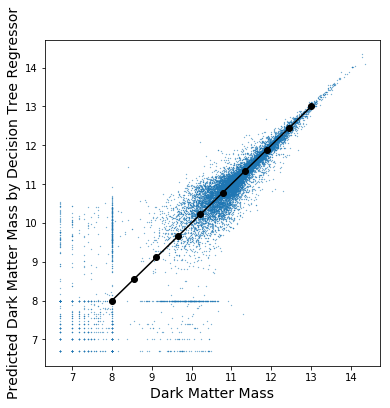

In [20]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

m = np.linspace(8, 13, 10)
n = m

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(Target,Cvpred, '.', markersize=0.5)
ax.plot(m, n, color='black', linestyle='-', marker='o')
ax.set_xlabel('Dark Matter Mass', fontsize=14)
ax.set_ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)
plt.show()

prediction :  [13.11878406 10.34456448 11.5559965  ...  8.41135517 11.1713191
 11.65008984]
R2 Score :  0.7444046854227069
The mean square value :  0.30968417453135544
The Score :  {'fit_time': array([0.09870529, 0.09683347, 0.09734249, 0.09997487, 0.09903264,
       0.09467196, 0.09549499]), 'score_time': array([0.00201797, 0.00184441, 0.00178432, 0.00213504, 0.00210214,
       0.00186014, 0.00216579]), 'test_score': array([0.77399464, 0.76865644, 0.77462986, 0.76341855, 0.77174535,
       0.77151139, 0.78163048]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.7722266739939068
Train Score :  1.0
Cross Vaidate prediction :  [14.08707509 11.56971764 10.75613257 ...  9.94082578  8.
  8.        ]
Pearson Correlation Coefficient: 0.8858321755301732
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Decision Tree Regressor')

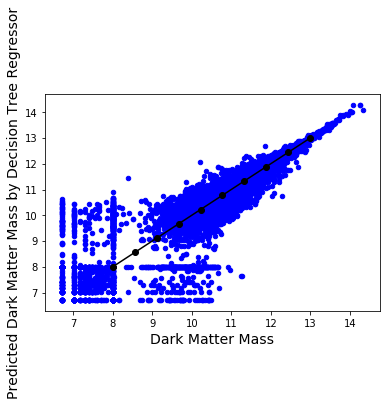

In [21]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

C_coeff, P_value = stats.pearsonr(Cvpred.reshape((18472,)), Target)
print("Pearson Correlation Coefficient:", C_coeff)
print("P-value:", P_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,Cvpred, s = 20, c = 'blue')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)

prediction :  [13.0441483  10.6671813  11.50742285 ...  8.60383217 11.29549287
 11.40481457]
R2 Score :  0.8370202096577105
The mean square value :  0.19746943296248207
The Score :  {'fit_time': array([0.03430367, 0.03322101, 0.03342462, 0.03467631, 0.03370118,
       0.03461456, 0.03355813]), 'score_time': array([0.017241  , 0.01661468, 0.01704359, 0.01711011, 0.01723576,
       0.0173831 , 0.01722646]), 'test_score': array([0.85041851, 0.83594031, 0.85441961, 0.81887883, 0.85649762,
       0.83500716, 0.8470319 ]), 'train_score': array([0.92256708, 0.92385425, 0.92279664, 0.92409477, 0.92194039,
       0.92340682, 0.92279875])}
Test Score :  0.8425991327280358
Train Score :  0.9230655280505725
Cross Vaidate prediction :  [13.63830987 11.8208361  11.97349741 ...  9.00950587  8.95742072
  8.13657868]
Pearson Correlation Coefficient: 0.9186193555274635
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by KNN Regressor')

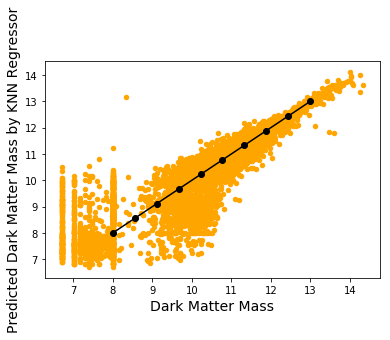

In [22]:
KnnRegressor = KNeighborsRegressor(n_neighbors=3)
KnnRegressor.fit(X_train, Y_train)
KY_pred = KnnRegressor.predict(X_test)
print ("prediction : ", KY_pred)

KR = r2_score(Y_test, KY_pred)
print ("R2 Score : ", KR)

KMse = mean_squared_error(Y_test, KY_pred)
print ("The mean square value : ", KMse)

KScores = cross_validate(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
KS = np.mean(KScores['test_score'])
print ("The Score : ", KScores)
print ("Test Score : ", KS)
print ("Train Score : ", np.mean(KScores['train_score']))

KCvpred = cross_val_predict(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", KCvpred)

KC_coeff, KP_value = stats.pearsonr(KCvpred.reshape((18472,)), Target)
print("Pearson Correlation Coefficient:", KC_coeff)
print("P-value:", KP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,KCvpred, s = 20, c = 'orange')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by KNN Regressor',fontsize=14)

prediction :  [13.55771006  9.57685676 11.5588666  ...  8.88321469 11.31734805
 11.44909094]
R2 Score :  0.7770686001040741
The mean square value :  0.27010795040615593
The Score :  {'fit_time': array([0.00697231, 0.0063417 , 0.00680041, 0.00626731, 0.00612783,
       0.00641823, 0.00679755]), 'score_time': array([0.00647235, 0.00269628, 0.00245142, 0.00252676, 0.00249243,
       0.00269175, 0.00241446]), 'test_score': array([0.79858051, 0.78272826, 0.79794263, 0.78606324, 0.78812356,
       0.77581983, 0.78279863]), 'train_score': array([0.78599961, 0.78873077, 0.78621767, 0.7881626 , 0.78780829,
       0.78983055, 0.78859249])}
Test Score :  0.7874366677229929
Train Score :  0.78790599554058
Cross Vaidate prediction :  [14.32026549 10.68958309 12.22399431 ...  8.40346514  8.80521986
  8.85875178]
Pearson Correlation Coefficient: 0.8874125681869323
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Linear Regressor')

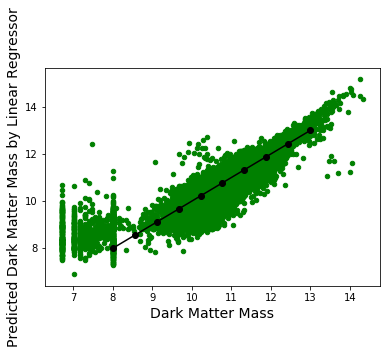

In [23]:
LRegressor = LinearRegression()
LRegressor.fit(X_train, Y_train)
LY_pred = LRegressor.predict(X_test)
print ("prediction : ", LY_pred)

LR = r2_score(Y_test, LY_pred)
print ("R2 Score : ", LR)

LMse = mean_squared_error(Y_test, LY_pred)
print ("The mean square value : ", LMse)

LScores = cross_validate(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
LS = np.mean(LScores['test_score'])
print ("The Score : ", LScores)
print ("Test Score : ", LS)
print ("Train Score : ", np.mean(LScores['train_score']))

LCvpred = cross_val_predict(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", LCvpred)

LC_coeff, LP_value = stats.pearsonr(LCvpred.reshape((18472,)), Target)
print("Pearson Correlation Coefficient:", LC_coeff)
print("P-value:", LP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,LCvpred, s = 20, c = 'green')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Linear Regressor',fontsize=14)

prediction :  [13.12218105 10.70109787 11.51514999 ...  8.71187824 11.16735461
 11.37698684]
R2 Score :  0.8314429434886028
The mean square value :  0.20422695538646787
The Score :  {'fit_time': array([5.70718026, 5.67058206, 5.68273306, 5.67576838, 5.66499519,
       5.6113472 , 5.667624  ]), 'score_time': array([0.07807684, 0.0777328 , 0.07757044, 0.07886267, 0.07822466,
       0.07717943, 0.07731628]), 'test_score': array([0.85654996, 0.84378815, 0.84916405, 0.83728939, 0.853767  ,
       0.84846333, 0.85114208]), 'train_score': array([0.97882372, 0.97993144, 0.97908786, 0.97933352, 0.97840326,
       0.9791813 , 0.9786051 ])}
Test Score :  0.8485948514269654
Train Score :  0.9790523140722004
Cross Vaidate prediction :  [14.15322228 11.94722322 11.64591261 ...  9.15426842  8.4636323
  8.00800995]
Pearson Correlation Coefficient: 0.9223963840270778
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Random Forest Regressor')

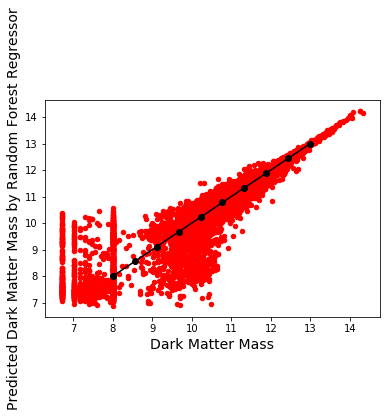

In [24]:
FORegressor = RandomForestRegressor()
FORegressor.fit(X_train, Y_train)
FOY_pred = FORegressor.predict(X_test)
print ("prediction : ", FOY_pred)

FOR = r2_score(Y_test, FOY_pred)
print ("R2 Score : ", FOR)

FOMse = mean_squared_error(Y_test, FOY_pred)
print ("The mean square value : ", FOMse)

FOScores = cross_validate(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
FOS = np.mean(FOScores['test_score'])
print ("The Score : ", FOScores)
print ("Test Score : ", FOS)
print ("Train Score : ", np.mean(FOScores['train_score']))

FOCvpred = cross_val_predict(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", FOCvpred)

FC_coeff, FP_value = stats.pearsonr(FOCvpred.reshape((18472,)), Target)
print("Pearson Correlation Coefficient:", FC_coeff)
print("P-value:", FP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,FOCvpred, s = 20, c = 'red')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Random Forest Regressor',fontsize=14)

prediction :  [13.12204448 10.64012532 11.48481953 ...  8.39901451 11.12084341
 11.37614281]
R2 Score :  0.8116998348900151
The mean square value :  0.22814808359317298
The Score :  {'fit_time': array([2.30655813, 2.30678582, 2.31681538, 2.34191132, 2.28839469,
       2.26737738, 2.2701726 ]), 'score_time': array([0.0973351 , 0.09666443, 0.09669447, 0.09385419, 0.09545827,
       0.09391665, 0.09553909]), 'test_score': array([0.84964715, 0.82530703, 0.8357652 , 0.82724357, 0.83587657,
       0.83097741, 0.83605073]), 'train_score': array([1., 1., 1., 1., 1., 1., 1.])}
Test Score :  0.8344096666260058
Train Score :  1.0
Cross Vaidate prediction :  [14.19226339 12.43815033 11.80643026 ...  8.96544767  8.11799225
  7.79096424]
Pearson Correlation Coefficient: 0.9147210536750878
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Extreme Random Forest Regressor')

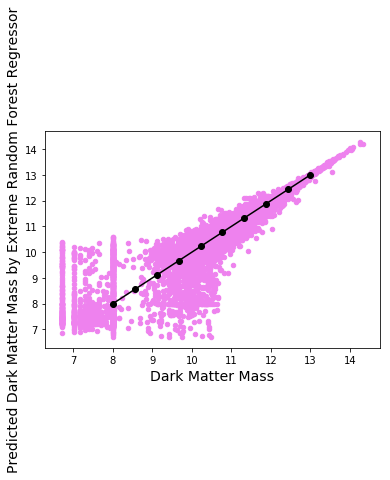

In [25]:
ETRegressor = ExtraTreesRegressor(n_estimators=100, random_state=33)
ETRegressor.fit(X_train, Y_train)
ETY_pred = ETRegressor.predict(X_test)
print ("prediction : ", ETY_pred)

ETR = r2_score(Y_test, ETY_pred)
print ("R2 Score : ", ETR)

ETMse = mean_squared_error(Y_test, ETY_pred)
print ("The mean square value : ", ETMse)

ETScores = cross_validate(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
ETS = np.mean(ETScores['test_score'])
print ("The Score : ", ETScores)
print ("Test Score : ", ETS)
print ("Train Score : ", np.mean(ETScores['train_score']))

ETCvpred = cross_val_predict(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", ETCvpred)

ETC_coeff, ETP_value = stats.pearsonr(ETCvpred.reshape((18472,)), Target)
print("Pearson Correlation Coefficient:", ETC_coeff)
print("P-value:", ETP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,ETCvpred, s = 20, c = 'violet')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Extreme Random Forest Regressor',fontsize=14)

 Model Comparisons for Case 2 


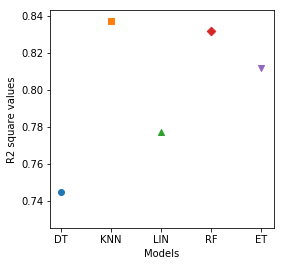

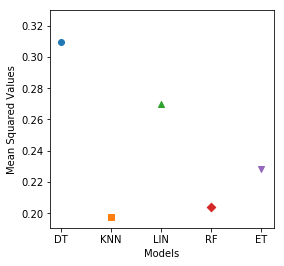

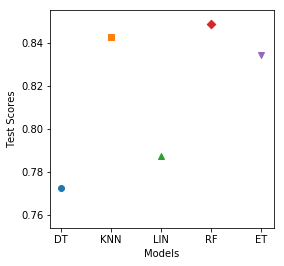

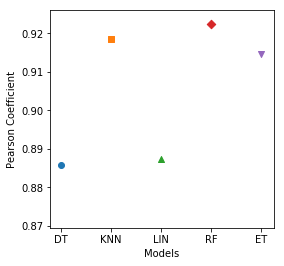

In [26]:
#COMPARISON GRAPH (CASE 2)

print ("\033[1m Model Comparisons for Case 2 \033[0m")

#R square
plt.figure(figsize=(4, 4))
g = [R, KR, LR, FOR, ETR]
h = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for i in range(len(g)):
    plt.scatter(h[i], g[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('R2 square values')
plt.show()

#Mean Squared Error

plt.figure(figsize=(4, 4))
gg = [Mse, KMse, LMse, FOMse, ETMse]
hh = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for i in range(len(gg)):
    plt.scatter(hh[i], gg[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.show()

#Test Scores

plt.figure(figsize=(4, 4))
G = [S, KS, LS, FOS, ETS]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Test Scores')
plt.show()

#Pearson Correlation

plt.figure(figsize=(4, 4))
G = [C_coeff, KC_coeff, LC_coeff, FC_coeff, ETC_coeff]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Pearson Coefficient')
plt.show()